In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from itertools import product
from scipy.optimize import curve_fit
import matplotlib.colors as colors
from numpy import polyfit, poly1d
import random


In [19]:
#
#data = np.load('C:/Users/wangy/Rydberg simulation/rydberg_data/2_15_23/2023_02_15_08_19_33_818L24.npy',allow_pickle=True).tolist()
#data = np.load('C:/Users/wangy/Rydberg simulation/rydberg_data/2_15_23/2023_02_15_12_20_06_113L24.npy',allow_pickle=True).tolist()


data = np.load('C:/Users/wangy/Rydberg simulation/rydberg_data/2_18/2023_02_19_15_59_06_465L32.npy',allow_pickle=True).tolist()


In [20]:


selected_data = [data]

N = []
t = []
detuning = [] 
rabi = [] 
E = [] 
overlap = []
z_list = []
zz_list = []
zg_list = []
zzg_list = []
for i in range(len(selected_data)):
    N.append(selected_data[i]['params']['L'])
    t.append(np.array(selected_data[i]['nT'])[:,1]) # scan time
    detuning.append(np.array(selected_data[i]['nT'])[:,3]) # detuning
    rabi.append(np.array(selected_data[i]['nT'])[:,2]) # Rabi
    E.append(np.array(selected_data[i]['E'])) # energy for the lowest three states
    overlap.append(np.array(selected_data[i]['overlap']))# overlap with fm, afm, ground state, 1st excited state, 2nd excited state
    z_list.append(np.array(selected_data[i]['z'])) # rydberg population  
    zz_list.append(np.array(selected_data[i]['zz']))# correlation of the rydbegrg population
    zg_list.append(np.array(selected_data[i]['zg']))# rydberg population for the ground state
    zzg_list.append(np.array(selected_data[i]['zzg']))# correlation of the rydberg population for the ground state
    print('i',i)
    print('Average U ',selected_data[i]['params']['U'])
    print('U',selected_data[i]['params']['random_U'])

    print(zzg_list[i].shape)
    print(selected_data[i]['params'])


i 0
Average U  18.0
U [859.83993542 412.15467979 831.41547475 412.15467979 412.15467979
 845.62770509 618.23201968 859.83993542 731.92986238 618.23201968
 852.73382025 618.23201968 731.92986238 859.83993542 852.73382025
 540.06475283 831.41547475 845.62770509 540.06475283 852.73382025
 831.41547475 852.73382025 540.06475283 831.41547475 845.62770509
 731.92986238 412.15467979 859.83993542 618.23201968 731.92986238
 845.62770509 540.06475283]
(106, 32, 32)
{'dirc': '/n/home09/nd7ryw/holyholyscratch/tenpy_data/', 'L': 32, 'Omega': 1.5, 'U': 18.0, 'chi': 128, 'N_steps': 1, 'Rabi_ramp_time': 2.0, 'Rabi_ramp_dt': 0.1, 'T_DiLILA': 8.0, 'Gap_init': 5.23, 'Gap_crit': 0.249, 'Gap_final': 3.463, 'Delta_ini': -5.0, 'Delta_crit': 1.6, 'Delta_fin': 4.8, 'tinflect': 5.0, 'auto_tinflect': 1.0, 'dt': 0.052, 'random_U': array([859.83993542, 412.15467979, 831.41547475, 412.15467979,
       412.15467979, 845.62770509, 618.23201968, 859.83993542,
       731.92986238, 618.23201968, 852.73382025, 618.232019

In [4]:
i = 0
gap = np.array((E[i][:,2]-E[i][:,0])/2/np.pi)
print('Detuning',detuning[0][19:])
print('gap',gap[19:])


Detuning [-5.         -5.         -3.93868598 -3.1365912  -2.50908226 -2.00475265
 -1.59057411 -1.24435752 -0.95064355 -0.69833115 -0.4792428  -0.28722153
 -0.11754319  0.03347742  0.16875733  0.29063559  0.40100969  0.50143503
  0.59319875  0.67737509  0.75486773  0.82644231  0.89275185  0.95435666
  1.01174031  1.06532228  1.11546824  1.16249844  1.20669452  1.24830516
  1.2875508   1.32462748  1.35971017  1.39295553  1.4245042   1.45448283
  1.48300579  1.51017658  1.53608913  1.56082886  1.58447364  1.60709458
  1.62875677  1.6495199   1.6694388   1.68856395  1.70694185  1.72461546
  1.7416245   1.75800578  1.7737934   1.78901908  1.80371228  1.81790046
  1.83160922  1.84486245  1.85768248  1.87009023  1.88210525  1.8937459
  1.90502942  1.91597198  1.92658882  1.93689426  1.94690181  1.95662419
  1.96607343  1.97526088  1.98419726  1.99289274  2.00135692  2.0095989
  2.01762733  2.0254504   2.03307589  2.0405112   2.04776333  2.054839
  2.06174455  2.06848605  2.07506928  2.081499

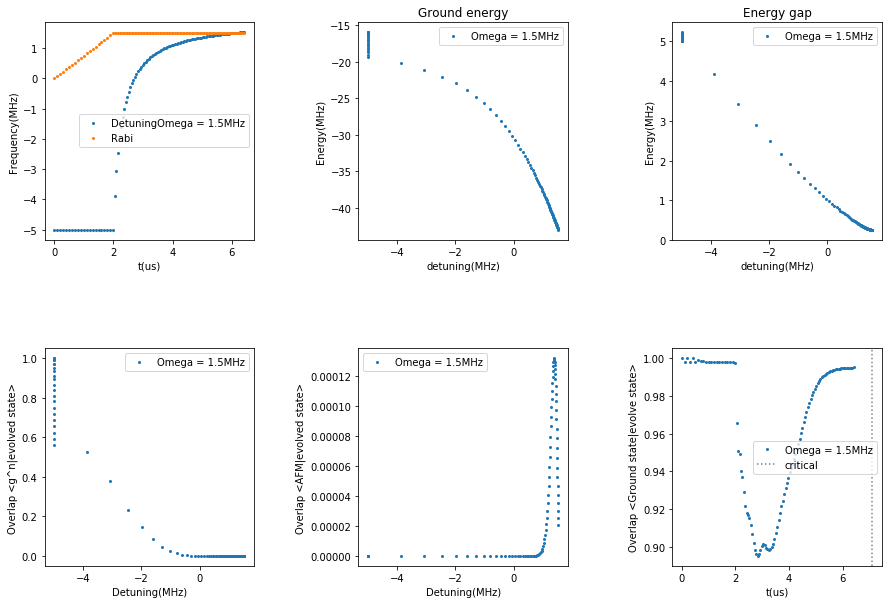

In [21]:
ms = 2
ls = ''
fig, ax = plt.subplots(2, 3, figsize=(15,10))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
for i in range(len(N)):
    label0 ='Omega = '+ str((selected_data[i]['params']['Omega']))+'MHz'
    ax[0,0].plot(t[i],detuning[i],marker='o',markersize = ms,ls = ls,label = 'Detuning'+label0 )
    ax[0,1].plot(detuning[i],(E[i][:,0])/2/np.pi,marker='o',markersize = ms,ls = ls,label= label0)
    ax[0,2].plot(detuning[i],(E[i][:,2]-E[i][:,0])/2/np.pi,marker='o',markersize = ms,ls = ls,label= label0)
    ax[1,0].plot(detuning[i],overlap[i][:,0],marker='o',markersize = ms,ls = ls,label= label0)
    ax[1,1].plot(detuning[i],overlap[i][:,1],marker='o',markersize = ms,ls = ls,label= label0)
    ax[1,2].plot(t[i],overlap[i][:,2]+overlap[i][:,3],marker='o',markersize = ms,ls = ls,label= label0)
    #ax[1,2].plot(t[i],overlap[i][:,4],marker='o',markersize = ms,ls = ls,label= label0+'2nd excited',color = color_list[i])
ax[0,0].plot(t[i],rabi[i],marker='o',markersize = ms,ls = ls,label = 'Rabi')



ax[1,2].axvline(7.1,color = 'grey',ls = ':',label ='critical')
ax[0,0].set_xlabel('t(us)')
ax[0,0].set_ylabel('Frequency(MHz)')
#ax[0,0].set_title('Rabi or Detuning')
ax[0,0].legend()
ax[0,1].set_ylabel('Energy(MHz)')
ax[0,1].set_xlabel('detuning(MHz)')
ax[0,1].set_title('Ground energy')
ax[0,1].legend()
ax[0,2].set_ylabel('Energy(MHz)')
ax[0,2].set_xlabel('detuning(MHz)')
ax[0,2].set_title('Energy gap')

ax[0,2].legend()
ax[1,0].set_xlabel('Detuning(MHz)')
ax[1,0].set_ylabel('Overlap <g^n|evolved state>')
ax[1,0].legend()
ax[1,1].set_xlabel('Detuning(MHz)')
ax[1,1].set_ylabel('Overlap <AFM|evolved state>')
ax[1,1].legend()
ax[1,2].set_xlabel('t(us)')
ax[1,2].set_ylabel('Overlap <Ground state|evolve state>')
ax[1,2].legend()



i = 0
Omega = 1.5MHz
intial_detuning-5.0
intial_gap5.000000000000001
crit_id  104
crit_t6.3679999999999835
crit_detuning1.5274471826050606
crit_gap0.2549555994815591
final_detuning1.531910354321332
final_gap0.25504434590692826


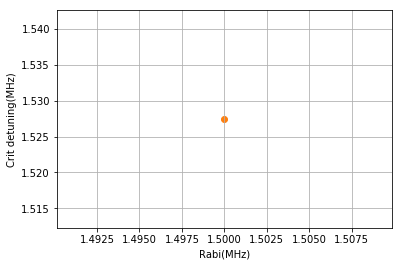

In [22]:
crit_id_list = []
for i in range(len(N)):
    print('i =',i)
    label0 ='Omega = '+ str((selected_data[i]['params']['Omega']))+'MHz'

    print(label0)
  #  print(np.array([gap,detuning[i]])
    gap = (E[i][:,2]-E[i][:,0])/2/np.pi
    crit_id = np.argmin(gap)
   # crit_id = np.argmin(abs(detuning[i]-(selected_data[i]['params']['Delta_crit'])))
    crit_id_list.append(crit_id)
    print('intial_detuning'+str(detuning[i][0]))
    print('intial_gap'+str(gap[0]))
    print('crit_id ', crit_id)
    print('crit_t'+str(t[i][crit_id]))
    print('crit_detuning'+str(detuning[i][crit_id]))
    print('crit_gap'+str(gap[crit_id]))
    print('final_detuning'+str(detuning[i][-1]))
    print('final_gap'+str(gap[-1]))
    plt.scatter(selected_data[i]['params']['Omega'],detuning[i][crit_id],color = 'C1')
plt.xlabel('Rabi(MHz)')
plt.ylabel('Crit detuning(MHz)')
plt.grid(which = 'both')
          
    


In [23]:
sigma_1_list = []
sigma_2_list = []
x_list = []
for i in range(len(N)):
    sigma1 = [] # single body sigma field
    sigma2 = [] # correlation of sigma field
    # do something
    sign = np.ones(N[i])
    sign[0::2]=-1
    x_temp = np.arange(N[i])
    x_list.append(x_temp)
    for t_index in range(len(selected_data[i]['zz'])):
        n_temp = np.array(selected_data[i]['z'])[t_index] # rydberg population at time t
        n_temp_mean = np.mean(n_temp)
        nn_temp = np.array(selected_data[i]['zz'])[t_index]
        sigma_temp = (n_temp[:]-n_temp_mean)*sign
        sigma1.append(sigma_temp)
        
        for x in x_temp:
            temp_g = (-1)**x *(nn_temp[0,x]-n_temp_mean*n_temp[0]-n_temp_mean*n_temp[x]+n_temp_mean**2)
            sigma2.append(temp_g)
    sigma2 = np.array(sigma2)
    sigma2 = sigma2.reshape(len(selected_data[i]['zg']),N[i])
    sigma_1_list.append(sigma1)   
    sigma_2_list.append(sigma2)
sigma_1_g_list = []
sigma_2_g_list = []
x_list = []
for i in range(len(N)):
    sigma1_g = [] # single body sigma field
    sigma2_g = [] # correlation of sigma field
    # do something
    sign = np.ones(N[i])
    sign[0::2]=-1
    x_temp = np.arange(N[i])
    x_list.append(x_temp)
    for t_index in range(len(selected_data[i]['zg'])):
        n_temp = np.array(selected_data[i]['zg'])[t_index] # rydberg population at time t
        n_temp_mean = np.mean(n_temp)
        nn_temp = np.array(selected_data[i]['zzg'])[t_index]
        sigma_temp = (n_temp[:]-n_temp_mean)*sign
        sigma1_g.append(sigma_temp)
        for x in x_temp:
            temp_g = (-1)**x *(nn_temp[0,x]-n_temp_mean*n_temp[0]-n_temp_mean*n_temp[x]+n_temp_mean**2)
            sigma2_g.append(temp_g)
    sigma2_g = np.array(sigma2_g)
    sigma2_g = sigma2_g.reshape(len(selected_data[i]['zg']),N[i])
    sigma_1_g_list.append(sigma1_g)   
    sigma_2_g_list.append(sigma2_g)
    

Text(0.53, 1.05, '8.0us Dilila ramp,Rabi = 1.5MHz')

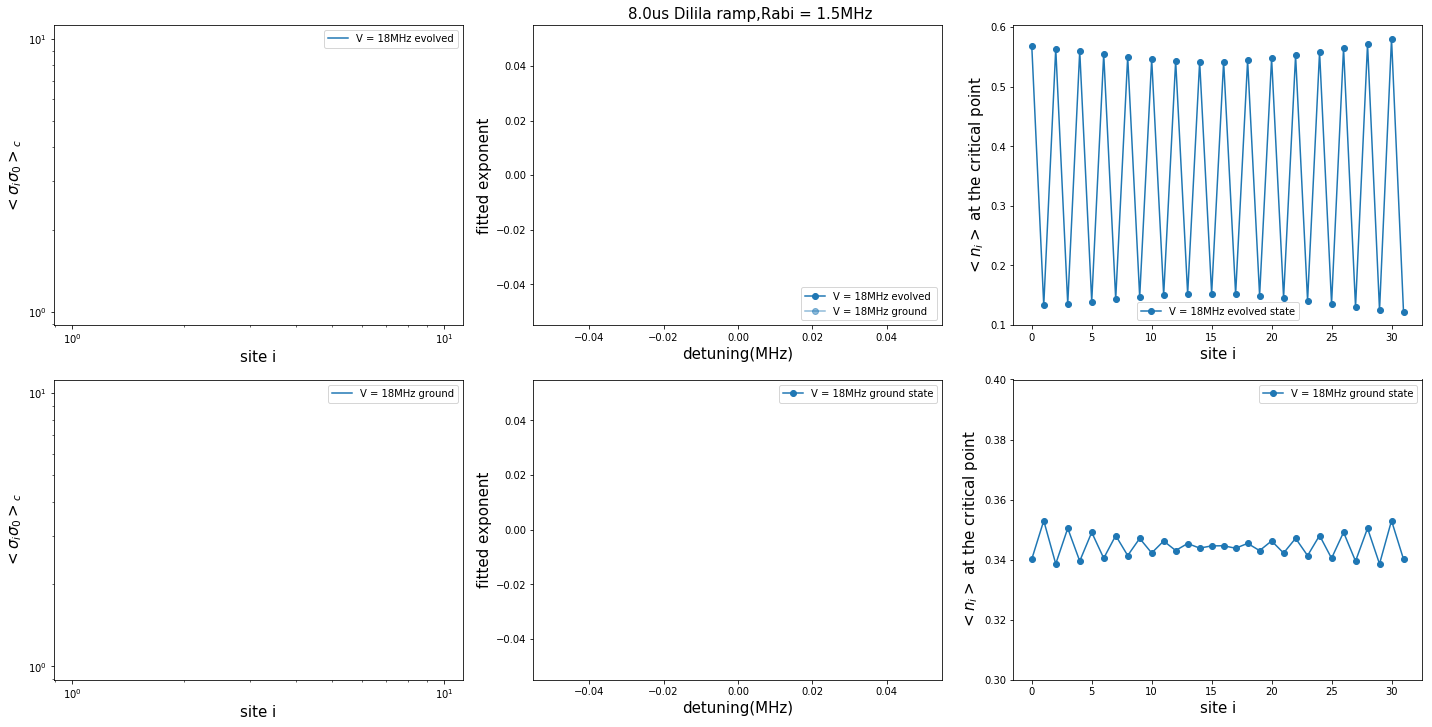

In [24]:
fs = 15
ms = 1
# the detuning range of interest
spacing = 1 # *0.052us
intial_detuning =1.8
final_detuning = 2.2
def power_law(x, a, b):
    return a * x**b
marker_list = ['s','o','v','^']
exponent_list = []
exponent_g_list = []
fig,ax = plt.subplots(ncols=3,nrows=2,figsize=(20,10))

for i_n,i in enumerate(range(len(N))):
    label0 ='V = '+ str(int(selected_data[i]['params']['U']))+'MHz'

    ax[0,0].plot([],[],label = label0+' evolved',color='C%d'%i_n )
    ax[0,0].legend()
    ax[1,0].plot([],[],label = label0+' ground',color='C%d'%i_n )
    ax[1,0].legend()
    exponent = []
    exponent_g = []
    detuning_list = []
    initial_id = np.argmin(abs(detuning[i]-intial_detuning))
    final_id = np.argmin(abs(detuning[i]-final_detuning))
    #for it,t_id in enumerate(range(crit_id_list[i]-10,crit_id_list[i]+10,1)):
    for it,t_id in enumerate(range(initial_id,final_id,spacing)):

        detuning_list.append(detuning[i][t_id])
        ax[0,0].plot(x_list[i],sigma_2_list[i][t_id],marker = '.',ls = '' )
        ax[1,0].plot(x_list[i],sigma_2_g_list[i][t_id],marker = '.',ls = '')
#         print('aha',detuning[i][t_id])
#         print(sigma_2_list[i][t_id])
        fit_range = int(N[i]/2-2)
        xdata = np.arange(1,fit_range)
        ydata = sigma_2_list[i][t_id,1:fit_range]
        #print(sigma_2_list[i][t_id])
        params, params_covariance= curve_fit(power_law, xdata, ydata)
        xfit = np.linspace(1, fit_range+1, 100)
        yfit = power_law(xfit, params[0], params[1])
        exponent.append(params[1])
        
        xdata_g = np.arange(1,fit_range)
        ydata_g = sigma_2_g_list[i][t_id,1:fit_range]
        params_g, params_g_covariance= curve_fit(power_law, xdata_g, ydata_g)
        #print(params_g)
        #print(N[i],detuning[i][t_id],params_g_covariance[1,1]**0.5/params_g[1])
        xfit_g = np.linspace(1, fit_range+1, 100)
        yfit_g = power_law(xfit_g, params_g[0], params_g[1])
        exponent_g.append(params_g[1])
        #print(detuning[i][t_id],params[1])
        ax[1,1].axhline(-0.25)
        ax[0,1].axhline(-0.25)
        ax[0,1].axvline(detuning[i][crit_id_list[i]],color = 'C%d'%i_n)
        ax[0,0].plot(xfit, yfit, '-')
        ax[1,0].plot(xfit_g, yfit_g, '-')

    
        if t_id == crit_id_list[i]:
                ax[0,1].scatter(detuning[i][t_id],params[1],s=200,color='C%d'%i_n,marker = '*',zorder = 2)
                ax[1,1].scatter(detuning[i][t_id],params_g[1],s=200,color='C%d'%i_n,marker = '*',zorder = 2)

    ax[0,2].plot(np.arange(0,N[i]),z_list[i][crit_id_list[i]],color='C%d'%i_n,label= label0+' evolved state',marker = 'o')

    ax[1,2].plot(np.arange(0,N[i]),zg_list[i][crit_id_list[i]],color='C%d'%i_n,label= label0+' ground state',marker = 'o')

               
       
    ax[0,1].plot(detuning_list,exponent,marker = 'o',ls = '-',zorder =1,label= label0+' evolved ')
    ax[0,1].plot(detuning_list,exponent_g,marker = 'o',ls = '-',color='C%d'%i_n,zorder =1,label= label0+' ground ',alpha =0.5)

    ax[1,1].plot(detuning_list,exponent_g,marker = 'o',ls = '-',color='C%d'%i_n,zorder =1,label= label0+' ground state')
       
    ax[0,1].set_xlabel('detuning(MHz)',fontsize = fs)
    ax[0,1].set_ylabel('fitted exponent',fontsize = fs)
    ax[0,1].legend(loc='lower right')
    ax[1,1].set_xlabel('detuning(MHz)',fontsize = fs)
    ax[1,1].set_ylabel('fitted exponent',fontsize = fs)
    ax[1,1].legend()
    exponent_list.append(exponent)
    ax[0,0].set_xlabel('site i',fontsize = fs)
    ax[0,0].set_ylabel('$<\sigma_i\sigma_0>_c$',fontsize = fs)
    ax[1,0].legend()

   #ax[0,2].set_ylim([0.3,0.4])
    ax[0,2].set_xlabel('site i',fontsize = fs)
    ax[0,2].set_ylabel('$<n_i>$ at the critical point',fontsize = fs)
    ax[0,2].legend()

    exponent_g_list.append(exponent_g)
    ax[1,0].set_xlabel('site i',fontsize = fs)
    ax[1,0].set_ylabel('$<\sigma_i\sigma_0>_c$',fontsize = fs)    
    
    ax[1,2].set_ylim([0.3,0.4])
    ax[1,2].set_xlabel('site i',fontsize = fs)
    ax[1,2].set_ylabel('$<n_i>$ at the critical point',fontsize = fs)
    ax[1,2].legend()

    ax[0,0].set_xscale('log')
    ax[0,0].set_yscale('log')    
    ax[1,0].set_xscale('log')
    ax[1,0].set_yscale('log')  
    fig.tight_layout()
title = str(selected_data[0]['params']['T_DiLILA'])+'us Dilila ramp,'+'Rabi = '+str(selected_data[0]['params']['Omega'])+'MHz'

ax[0,1].set_title(title,fontsize=fs,x=0.53,y=1.05)    

# print('Correlatorof the evolved state'+ str(np.round(sigma2,5)))
# print('Correlator of the ground state'+ str(np.round(sigma2_g,5)

In [27]:
sigma_1_list = []
sigma_2_list = []
sigma_1_g_list = []
sigma_2_g_list = []
x_list = []
for i in range(len(N)):
    tsteps = len(selected_data[i]['zz'])
    sigma1 = np.zeros([tsteps,N[i]]) # single body sigma field
    sigma1_g = np.zeros([tsteps,N[i]]) # single body sigma field

    sigma2 = np.zeros([tsteps,N[i],N[i]]) # correlation of sigma field
    sigma2_g = np.zeros([tsteps,N[i],N[i]]) # correlation of sigma field

    # do something
    sign = np.ones(N[i])
    sign[0::2]=-1
    x_temp = np.arange(N[i])
    x_list.append(x_temp)
    for t_index in range(tsteps):
        n_temp_g = np.array(selected_data[i]['zg'])[t_index] # rydberg population at time t
        n_temp_mean_g = np.mean(n_temp_g)
        nn_temp_g = np.array(selected_data[i]['zzg'])[t_index]
        sigma_temp_g = (n_temp_g[:]-n_temp_mean_g)*sign
        sigma1_g[t_index] = sigma_temp_g
        
        n_temp = np.array(selected_data[i]['z'])[t_index] # rydberg population at time t
        n_temp_mean = np.mean(n_temp)
        nn_temp = np.array(selected_data[i]['zz'])[t_index]
        sigma_temp = (n_temp[:]-n_temp_mean)*sign
        sigma1[t_index] = sigma_temp
        for x in x_temp:
            for y in x_temp:
                temp = ((-1)**(x+y)) *(nn_temp[x,y]-n_temp_mean*n_temp[x]-n_temp_mean*n_temp[y]+n_temp_mean**2)
                sigma2[t_index,x,y] = temp
                temp_g = (-1)**(x+y) *(nn_temp_g[x,y]-n_temp_mean_g*n_temp_g[x]-n_temp_mean_g*n_temp_g[y]+n_temp_mean_g**2)
                sigma2_g[t_index,x,y] = temp_g
    sigma_1_list.append(sigma1)   
    sigma_2_list.append(sigma2)
    sigma_1_g_list.append(sigma1_g)   
    sigma_2_g_list.append(sigma2_g)
# take average over evenly distributed 
mean_sigma_1_list =  np.mean(sigma_1_list,axis = -1)   
mean_sigma_1_g_list =  np.mean(sigma_1_g_list,axis = -1)
mean_sigma_2_list = []
mean_sigma_2_g_list = []
for i in range(len(N)):
    mean_sigma_2 = np.zeros([tsteps, N[i]])
    mean_sigma_2_g = np.zeros([tsteps, N[i]])
    sigma_2 = sigma_2_list[i]
    sigma_2_g = sigma_2_g_list[i]

    for t_index in range(tsteps):
        for x in range(N[i]):
            mean_sigma_2[t_index,x] = (np.trace(sigma_2[t_index],x)+np.trace(sigma_2[t_index],x-N[i]))/N[i]
            mean_sigma_2_g[t_index,x] = (np.trace(sigma_2_g[t_index],x)+np.trace(sigma_2_g[t_index],x-N[i]))/N[i]
        
    mean_sigma_2_list.append(mean_sigma_2)
    mean_sigma_2_g_list.append(mean_sigma_2_g)

No handles with labels found to put in legend.


Text(0.53, 1.05, '8.0us Dilila ramp,Rabi = 1.5MHz')

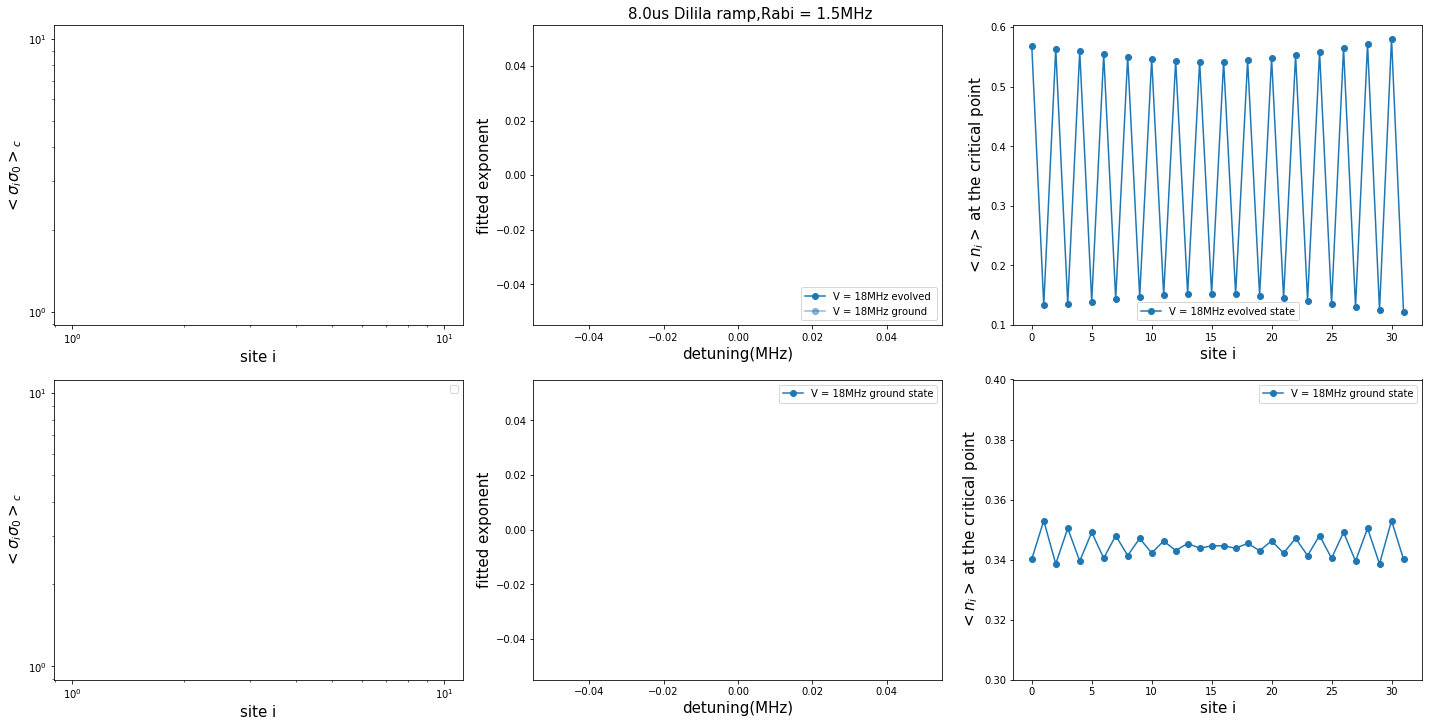

In [28]:
fs = 15
ms = 1
# the detuning range of interest
spacing = 1 # *0.052us
intial_detuning =1.8
final_detuning = 2.6

def power_law(x, a, b):
    return a * x**b
marker_list = ['s','o','v','^']
exponent_list = []
exponent_g_list = []
fig,ax = plt.subplots(ncols=3,nrows=2,figsize=(20,10))

for i_n,i in enumerate(range(len(N))):
    label0 ='V = '+ str(int(selected_data[i]['params']['U']))+'MHz'

#     ax[0,0].plot([],[],label = label0+' evolved',color='C%d'%i_n )
#     ax[0,0].legend()
#     ax[1,0].plot([],[],label = label0+' ground',color='C%d'%i_n )
#     ax[1,0].legend()
    exponent = []
    exponent_g = []
    detuning_list = []
    initial_id = np.argmin(abs(detuning[i]-intial_detuning))
    final_id = np.argmin(abs(detuning[i]-final_detuning))
    #for it,t_id in enumerate(range(crit_id_list[i]-10,crit_id_list[i]+10,1)):
    for i_t,t_id in enumerate(range(initial_id,final_id,spacing)):

        detuning_list.append(detuning[i][t_id])
#         ax[0,0].plot(x_list[i],mean_sigma_2_list[i][t_id],marker = '.',ls = ':',color = 'C%d'%i_t  )
#         ax[1,0].plot(x_list[i],mean_sigma_2_g_list[i][t_id],marker = '.',ls = ':',color = 'C%d'%i_t )
        ax[0,0].plot(x_list[i],mean_sigma_2_list[i][t_id],marker = '.',ls = ':' )
        ax[1,0].plot(x_list[i],mean_sigma_2_g_list[i][t_id],marker = '.',ls = ':' )
#         print('Detuning',detuning[i][t_id])
#         print('sigma(evolved)',mean_sigma_2_list[i][t_id])
#         print('sigma(ground)',mean_sigma_2_g_list[i][t_id])

        fit_range = int(N[i]/2-2)-2
        fit_initial = 1
        xdata = np.arange(fit_initial,fit_range+fit_initial-1)
        ydata = mean_sigma_2_list[i][t_id,fit_initial:fit_range+fit_initial-1]
        #print(sigma_2_list[i][t_id])
        params, params_covariance= curve_fit(power_law, xdata, ydata)
        xfit = np.linspace(fit_initial, fit_range+fit_initial, 100)
        yfit = power_law(xfit, params[0], params[1])
        exponent.append(params[1])
        
        xdata_g = np.arange(fit_initial,fit_range+fit_initial-1)
        ydata_g = mean_sigma_2_g_list[i][t_id,fit_initial:fit_range+fit_initial-1]
        params_g, params_g_covariance= curve_fit(power_law, xdata_g, ydata_g)
        #print(params_g)
        #print(N[i],detuning[i][t_id],params_g_covariance[1,1]**0.5/params_g[1])
        xfit_g = np.linspace(fit_initial, fit_range+fit_initial, 100)
        yfit_g = power_law(xfit_g, params_g[0], params_g[1])
        exponent_g.append(params_g[1])
        #print(detuning[i][t_id],params[1])
        ax[1,1].axhline(-0.25)
        ax[0,1].axhline(-0.25)
        ax[0,1].axvline(detuning[i][crit_id_list[i]],color = 'C%d'%i_n)
#         ax[0,0].plot(xfit, yfit, '-',color = 'C%d'%i_t )
#         ax[1,0].plot(xfit_g, yfit_g, '-',color = 'C%d'%i_t )
        ax[0,0].plot(xfit, yfit, '-')
        ax[1,0].plot(xfit_g, yfit_g, '-' )
    
        if t_id == crit_id_list[i]:
                ax[0,1].scatter(detuning[i][t_id],params[1],s=200,color='C%d'%i_n,marker = '*',zorder = 2)
                ax[1,1].scatter(detuning[i][t_id],params_g[1],s=200,color='C%d'%i_n,marker = '*',zorder = 2)

    ax[0,2].plot(np.arange(0,N[i]),z_list[i][crit_id_list[i]],color='C%d'%i_n,label= label0+' evolved state',marker = 'o')

    ax[1,2].plot(np.arange(0,N[i]),zg_list[i][crit_id_list[i]],color='C%d'%i_n,label= label0+' ground state',marker = 'o')

               
       
    ax[0,1].plot(detuning_list,exponent,marker = 'o',ls = '-',zorder =1,label= label0+' evolved ')
    ax[0,1].plot(detuning_list,exponent_g,marker = 'o',ls = '-',color='C%d'%i_n,zorder =1,label= label0+' ground ',alpha =0.5)

    ax[1,1].plot(detuning_list,exponent_g,marker = 'o',ls = '-',color='C%d'%i_n,zorder =1,label= label0+' ground state')
       
    ax[0,1].set_xlabel('detuning(MHz)',fontsize = fs)
    ax[0,1].set_ylabel('fitted exponent',fontsize = fs)
    ax[0,1].legend(loc='lower right')
    ax[1,1].set_xlabel('detuning(MHz)',fontsize = fs)
    ax[1,1].set_ylabel('fitted exponent',fontsize = fs)
    ax[1,1].legend()
    exponent_list.append(exponent)
    ax[0,0].set_xlabel('site i',fontsize = fs)
    ax[0,0].set_ylabel('$<\sigma_i\sigma_0>_c$',fontsize = fs)
    ax[1,0].legend()

   #ax[0,2].set_ylim([0.3,0.4])
    ax[0,2].set_xlabel('site i',fontsize = fs)
    ax[0,2].set_ylabel('$<n_i>$ at the critical point',fontsize = fs)
    ax[0,2].legend()

    exponent_g_list.append(exponent_g)
    ax[1,0].set_xlabel('site i',fontsize = fs)
    ax[1,0].set_ylabel('$<\sigma_i\sigma_0>_c$',fontsize = fs)    
    
    ax[1,2].set_ylim([0.3,0.4])
    ax[1,2].set_xlabel('site i',fontsize = fs)
    ax[1,2].set_ylabel('$<n_i>$ at the critical point',fontsize = fs)
    ax[1,2].legend()

    ax[0,0].set_xscale('log')
    ax[0,0].set_yscale('log')    
    ax[1,0].set_xscale('log')
    ax[1,0].set_yscale('log')  
    fig.tight_layout()
title = str(selected_data[0]['params']['T_DiLILA'])+'us Dilila ramp,'+'Rabi = '+str(selected_data[0]['params']['Omega'])+'MHz'

ax[0,1].set_title(title,fontsize=fs,x=0.53,y=1.05)    

# print('Correlatorof the evolved state'+ str(np.round(sigma2,5)))
# print('Correlator of the ground state'+ str(np.round(sigma2_g,5)

(array([ 99.,  87.,  88.,  91., 105., 103., 105., 111., 105., 106.]),
 array([0.60018748, 0.68008657, 0.75998566, 0.83988475, 0.91978384,
        0.99968293, 1.07958202, 1.15948111, 1.2393802 , 1.31927929,
        1.39917838]),
 <a list of 10 Patch objects>)

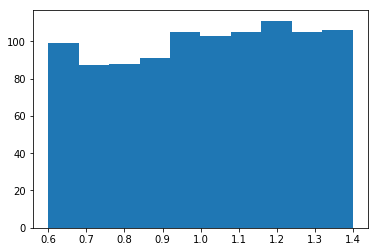

In [35]:
plt.hist(1+(np.random.random(1000)-0.5)*0.8)

In [37]:
0.98**23*0.02*24

0.30160669543301794

In [60]:
temp = np.repeat(np.array([1.19,0.76,1.17,0.58,1.21,1.20,0.87,1.03]),4)
temp = np.repeat(np.array([1.19,0.76,1.17,0.58,1.21,1.20,0.87,1.03]),4)
temp = np.repeat(np.array([1.19,0.76,1.17,0.58,1.21,1.20,0.87,1.03]),4)


In [62]:
np.random.shuffle(temp)
print(temp)
len(temp)

[0.58 1.17 1.03 1.17 1.21 0.76 0.58 1.19 0.76 1.17 1.19 1.2  1.03 1.19
 1.2  1.19 1.17 0.76 0.87 1.21 0.87 0.58 1.03 1.21 1.2  1.2  1.21 0.87
 1.03 0.76 0.58 0.87]


32

In [48]:
print(random.shuffle(np.array([1,2])))

None


In [52]:
np.random.shuffle(temp,len(temp))

TypeError: shuffle() takes exactly one argument (2 given)